In [23]:
from pathlib import Path

train_set=Path('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train')
test_set=Path('D:/Downloads/newDB/asl_alphabet_test/asl_alphabet_test')

# glob: used to retrieve files matching a specified pattern.
train_file_paths=list(train_set.glob(r'**/*.jpg'))
test_file_paths=list(test_set.glob(r'**/*.jpg'))

In [24]:
train_file_paths[:5]

[WindowsPath('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train/A/A1.jpg'),
 WindowsPath('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train/A/A10.jpg'),
 WindowsPath('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train/A/A100.jpg'),
 WindowsPath('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train/A/A1000.jpg'),
 WindowsPath('D:/Downloads/newDB/asl_alphabet_train/asl_alphabet_train/A/A1001.jpg')]

In [25]:
import pandas as pd

def getImage(fp,dset):
    
    if dset=="train":
        labels = [str(fp[i]).split("\\")[-2] \
              for i in range(len(fp))]   
    else:
        labels = [(str(fp[i]).split("\\")[-1])[0:-9] \
              for i in range(len(fp))]
    
    fp = pd.Series(fp, name='Filepath').astype(str)
    labels=pd.Series(labels,name='Label')
    
    df = pd.concat([fp, labels], axis=1)
    
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    
    return df

train_df=getImage(train_file_paths,"train")
test_df=getImage(test_file_paths,"test")

In [26]:
train_df

,Filepath,Label
0,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,W
1,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,E
2,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,O
3,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,K
4,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,N
...,...,...
86995,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,G
86996,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,nothing
86997,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,N
86998,D:\Downloads\newDB\asl_alphabet_train\asl_alph...,N


In [27]:
from PIL import Image
from numpy import asarray
import numpy as np

img=Image.open('D:/Downloads/my_data/my_test_data/Z_test.jpg');
width, height = img.size
width, height

(200, 200)

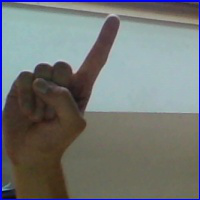

In [37]:
img

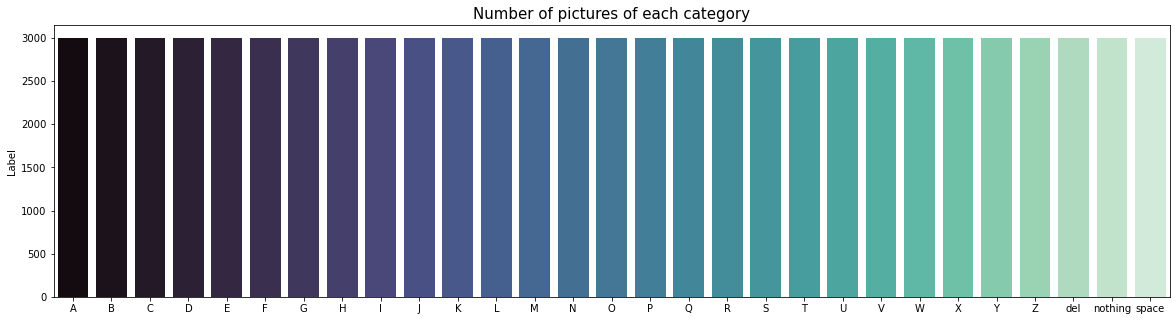

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
l = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = sorted(l.index), y = l, palette = "mako")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [39]:
train_df=train_df.loc[1:20000]

In [40]:
import tensorflow as tf

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

In [42]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 16000 validated image filenames belonging to 29 classes.
Found 4000 validated image filenames belonging to 29 classes.
Found 29 validated image filenames belonging to 29 classes.


In [48]:
train_images[0]

(array([[[[-1.        , -0.92941177,  0.92941177],
          [-1.        , -0.9529412 ,  1.        ],
          [-1.        , -1.        ,  0.94509804],
          ...,
          [-0.9843137 , -1.        ,  0.99215686],
          [-1.        , -1.        ,  0.9843137 ],
          [-1.        , -0.9764706 ,  1.        ]],
 
         [[-1.        , -0.9764706 ,  0.99215686],
          [-1.        , -1.        ,  0.7411765 ],
          [-0.85882354, -0.92941177,  0.5529412 ],
          ...,
          [-0.8980392 , -0.9764706 ,  0.39607847],
          [-0.8901961 , -0.9529412 ,  0.6156863 ],
          [-0.9843137 , -1.        ,  0.8509804 ]],
 
         [[-0.9764706 , -0.9843137 ,  1.        ],
          [-0.8666667 , -0.9529412 ,  0.5372549 ],
          [ 0.00392163, -0.09803921,  0.52156866],
          ...,
          [-0.1372549 , -0.2235294 ,  0.02745104],
          [-0.15294117, -0.24705881,  0.6       ],
          [-0.8901961 , -0.9843137 ,  0.64705884]],
 
         ...,
 
         [[-

In [42]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

baseModel = MobileNet(
    input_shape=(224, 224, 3),
     include_top=False,
     weights='imagenet',
     pooling='avg'
)
baseModel.trainable = False

input_t = baseModel.input

op=Dense(128, activation='relu')(baseModel.output)
op = Dropout(.5)(op) #to prevent overfitting
op =Dense(128, activation='relu')(op)
output_t = Dense(29, activation='softmax')(op)

model = Model(inputs=input_t, outputs=output_t)

In [43]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=3,
    callbacks=[
         tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
     ]
 )

Epoch 1/3
500/500 [==============================] - 926s 2s/step - loss: 2.0945 - accuracy: 0.4011 - val_loss: 0.2785 - val_accuracy: 0.9100
Epoch 2/3
500/500 [==============================] - 510s 1s/step - loss: 0.4671 - accuracy: 0.8445 - val_loss: 0.1316 - val_accuracy: 0.9610
Epoch 3/3
500/500 [==============================] - 504s 1s/step - loss: 0.2996 - accuracy: 0.8951 - val_loss: 0.0909 - val_accuracy: 0.9747


In [72]:
model.save('C:/Users/mihika/Desktop/m1.h5')

In [76]:
from tensorflow.keras import models   
model = models.load_model('C:/Users/mihika/Desktop/m1.h5')

In [77]:
tr_df=getImage(train_file_paths,"train")

In [78]:
train_df2=tr_df.loc[20000:40000]

In [79]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df2,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df2,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation'
)

Found 16001 validated image filenames belonging to 29 classes.
Found 4000 validated image filenames belonging to 29 classes.


In [80]:
initial_epochs =3
fine_tune_epochs = 3
total_epochs =  initial_epochs + fine_tune_epochs

history= model.fit(train_images,
                   epochs=total_epochs,
                   initial_epoch=history.epoch[-1],
                   validation_data=val_images, 
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(
                           monitor='val_loss',
                           patience=2,
                           restore_best_weights=True
                       )
                   ])


Epoch 3/6
501/501 [==============================] - 799s 2s/step - loss: 0.2579 - accuracy: 0.9107 - val_loss: 0.0561 - val_accuracy: 0.9870
Epoch 4/6
501/501 [==============================] - 466s 929ms/step - loss: 0.2128 - accuracy: 0.9263 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 5/6
501/501 [==============================] - 469s 937ms/step - loss: 0.2030 - accuracy: 0.9316 - val_loss: 0.0611 - val_accuracy: 0.9837
Epoch 6/6
  7/501 [..............................] - ETA: 6:36 - loss: 0.2162 - accuracy: 0.9286

KeyboardInterrupt: 

In [81]:
t=tr_df.loc[40000:44000]

In [95]:
t_images = test_generator.flow_from_dataframe(
    dataframe=t,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 4001 validated image filenames belonging to 29 classes.


In [96]:
pred = model.predict(t_images)
pred=np.argmax(pred,axis=1)

labels = (t_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = list(t.Label)

In [97]:
accuracy_score(y_test,pred)

0.9907523119220195

In [85]:
model.save('C:/Users/mihika/Desktop/m2.h5')

In [86]:
del model
model = models.load_model('C:/Users/mihika/Desktop/m2.h5')

In [91]:
train_df3=tr_df.loc[40000:60000]

In [92]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df3,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df3,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation'
)

Found 16001 validated image filenames belonging to 29 classes.
Found 4000 validated image filenames belonging to 29 classes.


In [93]:
history= model.fit(train_images,
                   epochs=3,
                   validation_data=val_images, 
                   callbacks=[
                       tf.keras.callbacks.EarlyStopping(
                           monitor='val_loss',
                           patience=2,
                           restore_best_weights=True
                       )
                   ])


Epoch 1/3
501/501 [==============================] - 827s 2s/step - loss: 0.2159 - accuracy: 0.9256 - val_loss: 0.0412 - val_accuracy: 0.9845
Epoch 2/3
501/501 [==============================] - 486s 970ms/step - loss: 0.1863 - accuracy: 0.9351 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 3/3
501/501 [==============================] - 508s 1s/step - loss: 0.1626 - accuracy: 0.9425 - val_loss: 0.0346 - val_accuracy: 0.9885


In [94]:
t=tr_df.loc[60000:64000]

In [98]:
model.save('C:/Users/mihika/Desktop/m3.h5')

In [8]:
from tensorflow.keras import models 
model = models.load_model('C:/Users/mihika/Desktop/m3.h5')

In [13]:
converter =  tf.lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open ("D:/DESKTOP/Minor Project/model.tflite" , "wb") .write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\mihika\AppData\Local\Temp\tmpmed_a09b\assets


13406792

In [16]:
labels='\n'.join(sorted(train_images.class_indices.keys()))
with open('D:/DESKTOP/Minor Project/labels.txt','w')as f:
    f.write(labels)